## Imprting necessary libraries

In [62]:
# Data manipulation & handling libraries
import pandas as pd 
import numpy as np

# Data visualisation
import matplotlib.pyplot as plt

# NMF
from sklearn.decomposition import NMF

# KMmeans
from sklearn.cluster import KMeans

# Nearest neighbors
from sklearn.neighbors import NearestNeighbors

## Loading the dataset

In [2]:
df = pd.read_csv('spotify.xls',index_col=0)

In [3]:
df

,song_1,song_2,song_3,song_4,song_5,song_6,song_7,song_8,song_9,song_10,...,song_4991,song_4992,song_4993,song_4994,song_4995,song_4996,song_4997,song_4998,song_4999,song_5000
user_1,2,2,8,8,13,1,4,9,1,2,...,14,2,14,1,9,0,11,6,14,7
user_2,13,5,5,5,12,8,10,10,2,2,...,10,6,11,1,1,5,12,8,3,0
user_3,3,9,2,8,0,1,11,7,3,7,...,9,5,7,15,12,13,14,5,0,14
user_4,2,6,7,8,14,0,12,7,8,1,...,9,15,9,14,10,6,11,13,6,0
user_5,11,12,8,6,13,7,0,7,3,13,...,12,14,11,11,11,7,3,6,11,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
user_996,8,0,11,10,1,10,13,13,10,6,...,10,0,8,4,0,7,13,7,2,6
user_997,7,6,9,6,15,6,14,2,9,7,...,15,9,2,2,6,1,0,5,15,11
user_998,6,2,1,5,1,7,2,4,4,0,...,0,13,6,13,0,1,11,13,6,13
user_999,7,0,8,12,6,2,6,2,0,12,...,14,7,12,3,5,15,5,11,9,12


## Understanding the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, user_1 to user_1000
Columns: 5000 entries, song_1 to song_5000
dtypes: int64(5000)
memory usage: 38.2+ MB


In [5]:
df.shape

(1000, 5000)

In [6]:
df.isnull().sum().sum()

0

In [7]:
X = df.values

In [8]:
X

array([[ 2,  2,  8, ...,  6, 14,  7],
       [13,  5,  5, ...,  8,  3,  0],
       [ 3,  9,  2, ...,  5,  0, 14],
       ...,
       [ 6,  2,  1, ..., 13,  6, 13],
       [ 7,  0,  8, ..., 11,  9, 12],
       [ 6, 15,  0, ..., 15,  4,  5]], dtype=int64)

## Non-negative Matrix Factorization (NMF)

In [9]:
nmf = NMF(n_components=100,max_iter=1000,random_state=10) # n_components = features,max_iter = no. of iterations allowed

In [10]:
nmf.fit(X)

C:\Users\MJO11805\AppData\Roaming\Python\Python39\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
C:\Users\MJO11805\AppData\Roaming\Python\Python39\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(


NMF(max_iter=1000, n_components=100, random_state=10)

In [11]:
user_matrix = nmf.transform(X)

In [12]:
song_matrix = nmf.components_.T

In [13]:
user_matrix

array([[0.        , 0.        , 1.65917367, ..., 0.        , 0.        ,
        1.87570247],
       [0.        , 0.        , 0.        , ..., 2.8027976 , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 4.62367029,
        0.        ],
       [0.        , 2.11579518, 0.00829455, ..., 0.        , 0.        ,
        1.07232688],
       [0.        , 0.        , 0.        , ..., 0.        , 1.69048514,
        0.        ]])

In [14]:
song_matrix

array([[0.        , 0.24795046, 0.02185775, ..., 0.13157294, 0.        ,
        0.19138292],
       [0.25238391, 0.18164336, 0.        , ..., 0.07732547, 0.0418576 ,
        0.        ],
       [0.46913486, 0.21636686, 0.00763448, ..., 0.31286831, 0.        ,
        0.40977389],
       ...,
       [0.01743582, 0.16529751, 0.23152147, ..., 0.21842531, 0.30490947,
        0.23801301],
       [0.        , 0.45217501, 0.31117264, ..., 0.16388584, 0.34932455,
        0.        ],
       [0.20204397, 0.17037827, 0.15762438, ..., 0.15301826, 0.15805216,
        0.04300445]])

In [15]:
user_matrix.shape

(1000, 100)

In [16]:
song_matrix.shape

(5000, 100)

## Steps for building recommendation system - Type 1 (small datasets example local library)
    1. Consider recommending songs to the first user(row location 0 in user matrix)
    2. Find the euclidean distance between first user and remaining 999 users
    3. Find out top 10 songs heard by nearest 5 users
    4. Recommend these 10 songs to user 1

### Calculating the distance 

In [19]:
def distance(u1,u2):
    return pow(sum(pow(u1[x]-u2[x],2) for x in range(len(u1))),0.5)

In [18]:
distance(user_matrix[0],user_matrix[1])

15.974796491754333

### Calculating distance between user 1 and remaining 999 users

In [20]:
def dist_from_remaining_users(b_user,user_matrix):
    dist = []
    for i in range(len(user_matrix)):
        if b_user != i:
            dist.append(distance(user_matrix[b_user],user_matrix[i]))
    return dist 

In [21]:
dist_user0= dist_from_remaining_users(0,user_matrix)

In [23]:
len(dist_user0)

999

### Finding nearest 5 users

In [24]:
nearest_users = np.argsort(dist_user0)[:5]

In [25]:
nearest_users

array([394, 779, 378, 349, 214], dtype=int64)

### Finding songs heard by nearest users

In [27]:
for i in nearest_users:
    print('Songs heard by user ',i,'are :')
    temp = df.iloc[i]
    print(temp[temp.values != 0].index)

Songs heard by user  394 are :
Index(['song_1', 'song_2', 'song_3', 'song_4', 'song_5', 'song_7', 'song_8',
       'song_9', 'song_10', 'song_11',
       ...
       'song_4991', 'song_4992', 'song_4993', 'song_4994', 'song_4995',
       'song_4996', 'song_4997', 'song_4998', 'song_4999', 'song_5000'],
      dtype='object', length=4694)
Songs heard by user  779 are :
Index(['song_1', 'song_2', 'song_3', 'song_4', 'song_5', 'song_6', 'song_7',
       'song_8', 'song_9', 'song_10',
       ...
       'song_4991', 'song_4992', 'song_4993', 'song_4994', 'song_4995',
       'song_4996', 'song_4997', 'song_4998', 'song_4999', 'song_5000'],
      dtype='object', length=4716)
Songs heard by user  378 are :
Index(['song_1', 'song_2', 'song_3', 'song_4', 'song_5', 'song_6', 'song_7',
       'song_8', 'song_10', 'song_12',
       ...
       'song_4989', 'song_4990', 'song_4992', 'song_4993', 'song_4995',
       'song_4996', 'song_4997', 'song_4998', 'song_4999', 'song_5000'],
      dtype='object', 

## Finding top 10 songs for nearest users

In [32]:
def top_n_songs(nearest_users,df,n=10):
    temp = df.iloc[nearest_users]
    dict1= temp.max().to_dict() # finding the maximum values from temp and storing in dict1
    # Converting every keyvalue pair into a tuple and swapping them for sorting purpose,end result is a list of 
    # songs and no. of times heard tuple
    sorted_dict = sorted(dict1.items(),key = lambda keyvalue: (keyvalue[1],keyvalue[0]),reverse=True)[:n]
    return [x[0] for x in sorted_dict]

In [33]:
top_n_songs(nearest_users,df,n=5)

['song_982', 'song_978', 'song_975', 'song_974', 'song_971']

## KMeans clustering - Type 2 (large datasets example spotify)

In [35]:
wcss = {}
for k in range (1,50):
    kmeans = KMeans(n_clusters=k,max_iter=1000).fit(song_matrix)
    wcss[k] = kmeans.inertia_

In [36]:
wcss

{1: 14101.98490287895,
 2: 13918.803927617435,
 3: 13788.013670180551,
 4: 13693.524189578098,
 5: 13614.049469020885,
 6: 13546.664578135644,
 7: 13492.436385744828,
 8: 13437.887971662009,
 9: 13395.413488943985,
 10: 13350.815629679444,
 11: 13322.521535550648,
 12: 13283.116139319724,
 13: 13258.669225372516,
 14: 13228.291251718132,
 15: 13206.761969357796,
 16: 13182.99508382459,
 17: 13154.162003937516,
 18: 13142.357791004399,
 19: 13102.652678969562,
 20: 13108.059693868414,
 21: 13078.789212222106,
 22: 13064.706700618568,
 23: 13049.3353729952,
 24: 13024.133130597844,
 25: 13011.649401227594,
 26: 12989.11136039615,
 27: 12987.053199692162,
 28: 12962.965873826095,
 29: 12954.857076731803,
 30: 12932.186251607985,
 31: 12922.258291552182,
 32: 12905.185657815126,
 33: 12896.321532830272,
 34: 12882.589425171376,
 35: 12868.499551760597,
 36: 12862.763257052764,
 37: 12846.619435254668,
 38: 12836.639625727235,
 39: 12827.038100262256,
 40: 12812.92263722221,
 41: 12798.3945

Text(0, 0.5, 'WCSS')

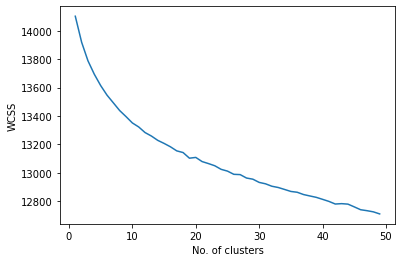

In [40]:
plt.plot(wcss.keys(),wcss.values())
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')

In [68]:
def songs_in_cluster(n_clusters,df,song_matrix,song_name,n_recommendations):
    kmeans = KMeans(n_clusters=n_clusters,max_iter=1000).fit(song_matrix)
    index_in_song = df.columns.to_list().index(song_name)
    #print(index_in_song)
    song_vector = song_matrix[index_in_song]
    #print(song_vector)
    all_songs_in_cluster = kmeans.predict(song_matrix)
    #print(len(all_songs_in_cluster))
    songs_in_selected_cluster = [x for x in range (len(all_songs_in_cluster))
                                if all_songs_in_cluster[x] == kmeans.predict([song_vector])]
    #print(songs_in_selected_cluster)
    song_cluster = song_matrix[songs_in_selected_cluster]
    #print(song_cluster)
    neighbors = NearestNeighbors(n_neighbors=n_recommendations)
    neighbors.fit(song_cluster)
    recommended_songs = neighbors.kneighbors([song_vector])
    #print(recommended_songs[1][0])
    songs = df.columns
    return [songs[x] for x in recommended_songs[1][0]]

In [69]:
songs_in_cluster(15,df,song_matrix,'song_5',5)

['song_2', 'song_220', 'song_172', 'song_142', 'song_74']